In [1]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
DIR = './aerial-cactus-identification/train/train'

In [4]:
df = pd.read_csv('./aerial-cactus-identification/train.csv')

In [5]:
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [6]:
int(df.loc[df['id'] == '000c8a36845c0208e833c79c1bffedd1.jpg']['has_cactus'])

1

In [7]:
def label_img(name):
    return int(df.loc[df['id'] == '000c8a36845c0208e833c79c1bffedd1.jpg']['has_cactus'])

In [8]:
IMG_SIZE = 300

In [9]:
def load_training_data():
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

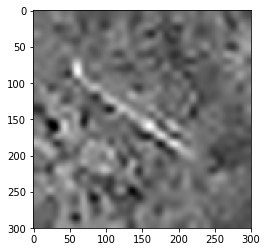

In [10]:
train_data = load_training_data()
plt.imshow(train_data[43][0], cmap = 'gist_gray')

In [11]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [12]:
trainImages.shape

(17500, 300, 300, 1)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

Using TensorFlow backend.


In [14]:
from keras.layers import Convolution2D

In [15]:
from keras import backend as K
K.set_image_dim_ordering('tf')

In [16]:
trainImages[0][0][0][0]

119

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [19]:
trainLabels.shape

(17500,)

In [20]:
from keras.utils import to_categorical

In [21]:
trainLabelsCat = to_categorical(trainLabels)
print(trainLabelsCat)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [22]:
model.fit(trainImages, trainLabelsCat, batch_size = 50, epochs = 1, verbose = 1)

Epoch 1/1
17500/17500 [==============================] - 2355s 135ms/step - loss: 0.0045 - acc: 0.9979


In [23]:
model.save("model.h5")

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 96)        55392     
__________

In [25]:
TEST_DIR = './aerial-cactus-identification/test/test/'

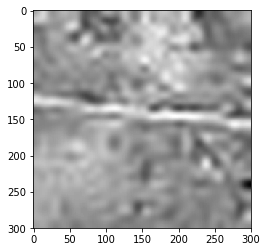

In [46]:
# Test on Test Set
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        imgName = img
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), imgName])
#     shuffle(test_data)
    return test_data


test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [49]:
test_data[0][1]

'000940378805c44108d287872b2f04ce.jpg'

In [50]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

# loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
# print(acc * 100)

In [51]:
testLabels

array(['000940378805c44108d287872b2f04ce.jpg',
       '0017242f54ececa4512b4d7937d1e21e.jpg',
       '001ee6d8564003107853118ab87df407.jpg', ...,
       'ffbd469c56873d064326204aac546e0d.jpg',
       'ffcb76b7d47f29ece11c751e5f763f52.jpg',
       'fffed17d1a8e0433a934db518d7f532c.jpg'], dtype='<U36')

In [52]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [53]:
predictions = model.predict(testImages, batch_size=50, verbose=1)

4000/4000 [==============================] - 253s 63ms/step


In [54]:
predictions

array([[7.0016459e-09, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [6.0812644e-10, 1.0000000e+00],
       ...,
       [9.4038399e-10, 1.0000000e+00],
       [8.0342388e-10, 1.0000000e+00],
       [2.9274371e-11, 1.0000000e+00]], dtype=float32)

In [61]:
predicted_labels = []

for pred in predictions:
    predicted_labels.append(int(pred[1]))

In [62]:
len(predicted_labels)

4000

In [68]:
pd.Series(predicted_labels).value_counts()

1    3662
0     338
dtype: int64

In [71]:
testLabels[10]

'00a36d4d6d152404670276fc983273bc.jpg'

In [75]:
labels_df = pd.DataFrame(testLabels, columns=['id'])
predLabels_df = pd.DataFrame(predicted_labels, columns=['has_cactus'])

In [78]:
predictions_df = pd.concat([labels_df, predLabels_df], axis=1)

In [79]:
predictions_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1
1,0017242f54ececa4512b4d7937d1e21e.jpg,1
2,001ee6d8564003107853118ab87df407.jpg,1
3,002e175c3c1e060769475f52182583d0.jpg,1
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1


In [80]:
predictions_df.to_csv('predictions.csv', index=None)